In [1]:
import tensorflow as tf
import os
from tensorflow.python.framework import ops
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
ops.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline


In [5]:
x = tf.constant(8)
y = tf.constant(9)
z = tf.multiply(x, y)

with tf.Session() as sess:
    print(sess.run(z))


72


In [7]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
z=tf.multiply(x,y)
with tf.Session() as sess:
    print(sess.run(z,feed_dict={x:2,y:3}))


6.0


In [9]:

x = tf.placeholder(tf.float32, shape=[1, 1]) # a placeholder for variable x
y = tf.placeholder(tf.float32, shape=[1, 1]) # a placeholder for variable y
m = tf.matmul(x, y)

with tf.Session() as sess:
    print(sess.run(m, feed_dict={x: [[2.]], y: [[4.]]}))

print(m)
print(m)

[[8.]]
Tensor("MatMul_1:0", shape=(1, 1), dtype=float32)
Tensor("MatMul_1:0", shape=(1, 1), dtype=float32)


In [3]:
x = tf.constant(8)
y = tf.constant(9)
z = tf.multiply(x, y)

sess = tf.Session()
out_z = sess.run(z)

print('The multiplication of x and y: %d' % out_z)

The multiplication of x and y: 72


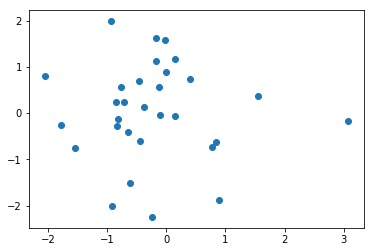

In [37]:
a=tf.random_normal([2,30])
with tf.Session() as sess:
    out = sess.run(a)
    x,y = out
plot.scatter(x,y)
plot.show()

In [15]:
a=tf.constant(4, name="nput_a")
b=tf.constant(2, name="nput_b")
c=tf.multiply(a, b, name="mul_c")
d=tf.add(a, b, name="add_d")
e=tf.add(c, d, name="add_e")

with tf.Session() as sess:
    print(sess.run(e))
    writer = tf.summary.FileWriter('./my_graph/1')
    writer.add_graph(sess.graph)


14


In [34]:
#value = tf.Variable(0, name="value")

value = tf.get_variable("value", shape=[], dtype=tf.int32, initializer=None, regularizer=None, trainable=True, collections=None)

one = tf.constant(1)
update_value = tf.assign_add(value, one)
initialize_var = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(initialize_var)
    print(sess.run(value))
    for _ in range(5):
        sess.run(update_value)
        print(sess.run(value))


0
1
2
3
4
5


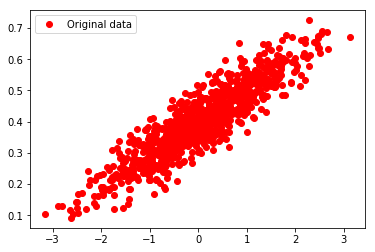

In [2]:
num_points = 1000
vectors_set = []

for i in range(num_points):
    W = 0.1  # W
    b = 0.4  # b
    x1 = np.random.normal(0.0, 1.0)
    nd = np.random.normal(0.0, 0.05)
    y1 = W * x1 + b
    # Add some impurity with the some normal distribution -i.e. nd
    y1 = y1 + nd
    # Append them and create a combined vector set
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

# Plot and show the data points on a 2D space
plot.plot(x_data, y_data, 'ro', label='Original data')
plot.legend()
plot.show()


In [51]:
#tf.name_scope organize things on the tensorboard graph view
with tf.name_scope("LinearRegression") as scope:
	W = tf.Variable(tf.zeros([1]))
	b = tf.Variable(tf.zeros([1]))
	y = W * x_data + b

# Define a loss function that take into account the distance between the prediction and our dataset
with tf.name_scope("LossFunction") as scope:
	loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Annotate loss, weights and bias (Needed for tensorboard)
loss_summary = tf.summary.scalar("loss", loss)
w_ = tf.summary.histogram("W", W)
b_ = tf.summary.histogram("b", b)

# Merge all the summaries
merged_op = tf.summary.merge_all()

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Writer for tensorboard (Directory)
writer_tensorboard = tf.summary.FileWriter('logs/', tf.get_default_graph())

for i in range(10):
	sess.run(train)
	print(i, sess.run(W), sess.run(b), sess.run(loss))
#	plot.plot(x_data, y_data, 'ro', label='Original data')
#	plot.plot(x_data, sess.run(W)*x_data + sess.run(b))
#	plot.xlabel('X')
#	plot.xlim(-2, 2)
#	plot.ylim(0.1, 0.6)
#	plot.ylabel('Y')
#	plot.legend()
#	plot.show()


0 [0.12541927] [0.4077747] 0.0034294748
1 [0.10103397] [0.39922574] 0.0027740006
2 [0.10095376] [0.4008879] 0.002771214
3 [0.10083828] [0.4008934] 0.0027712006
4 [0.10083476] [0.40090126] 0.0027712
5 [0.10083413] [0.4009015] 0.0027712006
6 [0.1008341] [0.40090153] 0.0027712001
7 [0.1008341] [0.40090153] 0.0027712001
8 [0.1008341] [0.40090153] 0.0027712001
9 [0.1008341] [0.40090153] 0.0027712001
